# OBJETIVO: ESTUDAR O USO DE INTERNET E SEUS MEIOS NO NORDESTE

# Hugo Gonçalves Rocha - Ciência dos Dados
    
    
            Um grande indicador de desenvolvimento de um determinado local é o acesso que seus habitantes possuem à internet. No Brasil, a 11ª edição da pesquisa TIC Domicílios 2015 afirma que apenas 58% dos brasileiros possuem acesso à internet, e naturalmente, as regiões mais pobres estão mais sujeitas à falta do recurso. A região brasileira mais pobre em termos absolutos é o Nordeste. Embora apresente melhora ao longo dos anos, a região possuia, segundo dados do IPEA, metade da população considerada pobre do país ao fim da primeira década do século XXI.
            Meu objetivo no Projeto 1 de Ciência dos Dados é estudar como o uso da internet se difundiu/retraiu entre os anos de 2013 e 2015. Para isso, utilizarei os dados da PNAD no que diz respeito ao uso de internet em casa e os meios para tal (celular, computador, tablet). O objetivo principal é comparar a situação nos três anos e identificar a possível causa de melhora/piora.

# Perguntas

- Qual estado do nordeste apresentou maior melhora no número de pessoas com acesso à internet no período?
- O meio rural tornou-se mais conectado?
- Qual meio de acesso apresentou maior crescimento em números absolutos de usuários no período?

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import os
from numpy import arange

In [3]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())
dados = pd.read_csv('DOM2015.csv')

Esperamos trabalhar no diretório
C:\Users\hugon\Desktop\INSPER\2º semestre\Ciência dos Dados\Projeto 1


In [4]:
dados.UF = dados.UF.astype('category')
dados.ACESSO = dados.V02322.astype('category')
dados.SALARIO = dados.V4621.astype('float')
dados.COMP = dados.V02323.astype('category')
dados.CEL = dados.V02324.astype('category')
dados.REG = dados.V4105.astype('category')
dados.TAB = dados.V02325.astype('category')
#dados.T = dados.V0226.astype('category')


In [5]:
dados.UF.cat.categories = (['Rondônia','Acre','Amazonas','Roraima','Pará','Amapá','Tocantins','Maranhão','Piauí','Ceará','Rio Grande do Norte','Paraíba','Pernambuco','Alagoas','Sergipe','Bahia','Minas Gerais','Espírito Santo','Rio de Janeiro','São Paulo','Paraná','Santa Catarina','Rio Grande do Sul','Mato Grosso do Sul','Mato Grosso','Goiás','Distrito Federal'])
dados.ACESSO.cat.categories = (['Possui acesso','Não possui acesso'])
dados.COMP.cat.categories = (['Sim','Não'])
dados.CEL.cat.categories = (['Sim','Não'])
dados.REG.cat.categories = (['URBANA - Cidade ou vila, área urbanizada', 'URBANA - Cidade ou vila, área não urbanizada','URBANA - área urbana isolada','RURAL - Aglomerado rural de extensão urbana','RURAL - Aglomerado rural, isolado, povoado','RURAL - Aglomerado rural, isolado, núcleo','RURAL - Aglomerado rural, isolado, outros aglomerados','RURAL - Zona rural exclusive aglomerado rural'])
dados.TAB.cat.categories = (['Sim','Não'])

d = pd.concat([dados.UF, dados.REG, dados.SALARIO, dados.ACESSO], axis = 1)
d.columns = ['ESTADO','ZONA','RENDA PER CAPITA (em R$)','ACESSO À INTERNET EM CASA']#'ACESSO À INTERNET POR MICROCOMPUTADOR', 'ACESSO À INTERNET POR CELULAR', 'ACESSO À INTERNET POR TABLET' ]
nordeste = d[(d['ESTADO'] == 'Maranhão') | (d['ESTADO'] == 'Piauí')| (d['ESTADO'] == 'Ceará')| (d['ESTADO'] == 'Rio Grande do Norte')| (d['ESTADO'] == 'Paraíba')| (d['ESTADO'] == 'Pernambuco')| (d['ESTADO'] == 'Alagoas')| (d['ESTADO'] == 'Sergipe')| (d['ESTADO'] == 'Bahia')]
nordeste = nordeste.dropna()

nordeste.loc[(dados.REG =='URBANA - Cidade ou vila, área urbanizada') |(dados.REG == 'URBANA - Cidade ou vila, área não urbanizada')|(dados.REG =='URBANA - área urbana isolada'), 'ZONA2'] = 'Urbana'
nordeste.loc[(dados.REG=='RURAL - Aglomerado rural de extensão urbana')|(dados.REG=='RURAL - Aglomerado rural, isolado, povoado')|(dados.REG=='RURAL - Aglomerado rural, isolado, núcleo') | (dados.REG == 'RURAL - Aglomerado rural, isolado, outros aglomerados')|(dados.REG == 'RURAL - Zona rural exclusive aglomerado rural'), 'ZONA2']= 'Rural'

nordeste

,ESTADO,ZONA,RENDA PER CAPITA (em R$),ACESSO À INTERNET EM CASA,ZONA2
21442,Maranhão,"URBANA - Cidade ou vila, área urbanizada",1576.0,Não possui acesso,Urbana
21443,Maranhão,"URBANA - Cidade ou vila, área urbanizada",394.0,Não possui acesso,Urbana
21444,Maranhão,"URBANA - Cidade ou vila, área urbanizada",436.0,Possui acesso,Urbana
21447,Maranhão,"URBANA - Cidade ou vila, área urbanizada",62.0,Não possui acesso,Urbana
21448,Maranhão,"URBANA - Cidade ou vila, área urbanizada",187.0,Possui acesso,Urbana
21449,Maranhão,"URBANA - Cidade ou vila, área urbanizada",244.0,Não possui acesso,Urbana
21450,Maranhão,"URBANA - Cidade ou vila, área urbanizada",151.0,Não possui acesso,Urbana
21451,Maranhão,"URBANA - Cidade ou vila, área urbanizada",1900.0,Possui acesso,Urbana
21452,Maranhão,"URBANA - Cidade ou vila, área urbanizada",2295.0,Possui acesso,Urbana
21454,Maranhão,"URBANA - Cidade ou vila, área urbanizada",419.0,Não possui acesso,Urbana


In [6]:
d1 = pd.concat([dados.UF, dados.REG, dados.SALARIO, dados.ACESSO, dados.COMP, dados.CEL, dados.TAB], axis = 1)
d1.columns = ['ESTADO','ZONA','RENDA PER CAPITA (em R$)','ACESSO À INTERNET EM CASA','ACESSO À INTERNET POR MICROCOMPUTADOR', 'ACESSO À INTERNET POR CELULAR', 'ACESSO À INTERNET POR TABLET' ]
nordeste1 = d1[(d1['ESTADO'] == 'Maranhão') | (d1['ESTADO'] == 'Piauí')| (d1['ESTADO'] == 'Ceará')| (d1['ESTADO'] == 'Rio Grande do Norte')| (d1['ESTADO'] == 'Paraíba')| (d1['ESTADO'] == 'Pernambuco')| (d1['ESTADO'] == 'Alagoas')| (d1['ESTADO'] == 'Sergipe')| (d1['ESTADO'] == 'Bahia')]
nordeste1 = nordeste1[(nordeste1['RENDA PER CAPITA (em R$)']<9999999999)]
nordeste1 = nordeste1.dropna()
nordeste1

,ESTADO,ZONA,RENDA PER CAPITA (em R$),ACESSO À INTERNET EM CASA,ACESSO À INTERNET POR MICROCOMPUTADOR,ACESSO À INTERNET POR CELULAR,ACESSO À INTERNET POR TABLET
21444,Maranhão,"URBANA - Cidade ou vila, área urbanizada",436.0,Possui acesso,Não,Sim,Não
21448,Maranhão,"URBANA - Cidade ou vila, área urbanizada",187.0,Possui acesso,Não,Sim,Não
21451,Maranhão,"URBANA - Cidade ou vila, área urbanizada",1900.0,Possui acesso,Não,Sim,Não
21452,Maranhão,"URBANA - Cidade ou vila, área urbanizada",2295.0,Possui acesso,Sim,Sim,Não
21455,Maranhão,"URBANA - Cidade ou vila, área urbanizada",680.0,Possui acesso,Não,Sim,Sim
21456,Maranhão,"URBANA - Cidade ou vila, área urbanizada",383.0,Possui acesso,Não,Sim,Não
21466,Maranhão,"URBANA - Cidade ou vila, área urbanizada",1059.0,Possui acesso,Não,Sim,Não
21467,Maranhão,"URBANA - Cidade ou vila, área urbanizada",453.0,Possui acesso,Não,Sim,Não
21484,Maranhão,"URBANA - Cidade ou vila, área urbanizada",561.0,Possui acesso,Não,Sim,Não
21485,Maranhão,"URBANA - Cidade ou vila, área urbanizada",702.0,Possui acesso,Não,Sim,Não


In [7]:
nordeste1['RENDA PER CAPITA (em R$)'].describe()

count    15870.000000
mean      1128.647385
std       1735.482211
min          0.000000
25%        390.000000
50%        650.000000
75%       1166.000000
max      40380.000000
Name: RENDA PER CAPITA (em R$), dtype: float64

In [33]:
faixa = arange(0,10000,179)

In [36]:
k = pd.cut(nordeste1['RENDA PER CAPITA (em R$)'], bins=faixa, right=False)

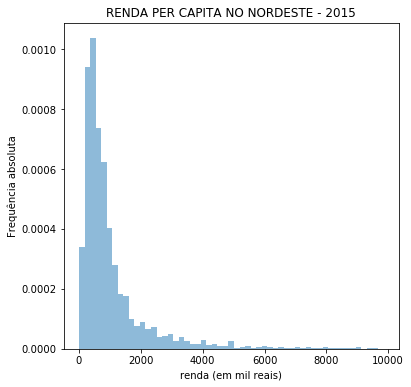

In [35]:

plot = nordeste1['RENDA PER CAPITA (em R$)'].plot.hist(bins=faixa, title='RENDA PER CAPITA NO NORDESTE - 2015', figsize=(6,6), normed = 1, alpha=0.5)
plt.ylabel('Frequência absoluta')
plt.xlabel('renda (em mil reais)')
plt.show()

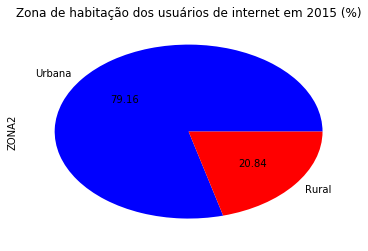

In [23]:
evc = nordeste['ZONA2'].value_counts()
evc.plot(kind='pie', colors=('b', 'r'), autopct="%.2f", title='Zona de habitação dos usuários de internet em 2015 (%)', legend=False)

In [24]:
#TABELA DE ACESSO À INTERNET NO NORDESTE (EM % POR ESTADO)

ct1=pd.crosstab(nordeste['ACESSO À INTERNET EM CASA'], nordeste['ESTADO'], margins=True, rownames=['ACESSO À INTERNET EM CASA'], colnames=['ESTADOS'], normalize='columns')*100
#ct1 = ct1[7:15]
ct1 = ct1.head(2)
ct1

ESTADOS,Maranhão,Piauí,Ceará,Rio Grande do Norte,Paraíba,Pernambuco,Alagoas,Sergipe,Bahia,All
ACESSO À INTERNET EM CASA,,,,,,,,,,
Possui acesso,33.128599,36.86067,45.601852,55.916775,53.723677,53.82929,40.0,57.411273,53.043478,49.252494
Não possui acesso,66.871401,63.13933,54.398148,44.083225,46.276323,46.17071,60.0,42.588727,46.956522,50.747506


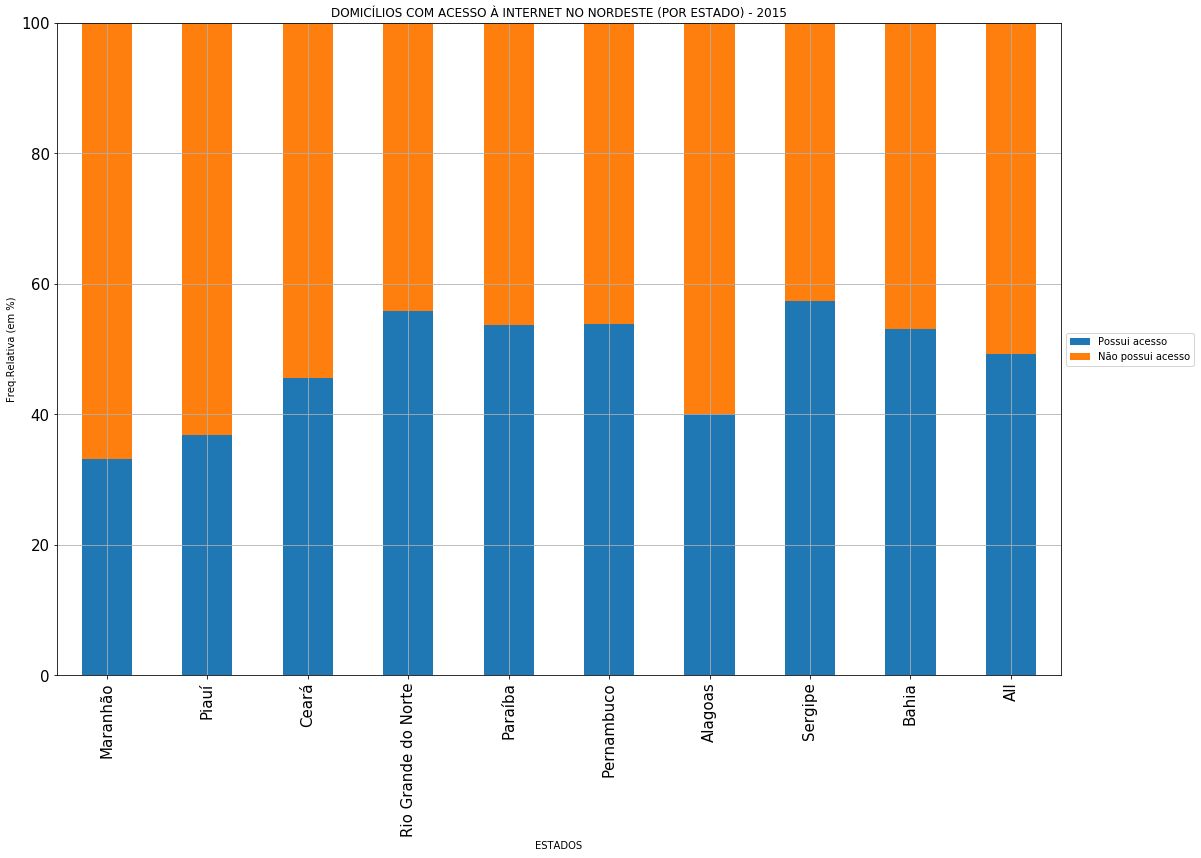

In [28]:
plot = ct1.T.plot(kind='bar', stacked=True,title='DOMICÍLIOS COM ACESSO À INTERNET NO NORDESTE (POR ESTADO) - 2015',fontsize=15)
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em %)')
plt.grid()

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 3, box.height*3])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [14]:
cel = nordeste1[nordeste1['ACESSO À INTERNET POR CELULAR']=='Sim']
mc = nordeste1[nordeste1['ACESSO À INTERNET POR MICROCOMPUTADOR']=='Sim']
tab = nordeste1[nordeste1['ACESSO À INTERNET POR TABLET']=='Sim']

In [15]:
print('Número de pessoas que acessam a internet pelo celular')
a = pd.value_counts(cel['ACESSO À INTERNET POR CELULAR'])
a

Número de pessoas que acessam a internet pelo celular


Sim    14983
Não        0
Name: ACESSO À INTERNET POR CELULAR, dtype: int64

In [16]:
print('Número de pessoas que acessam a internet pelo microcomputador')
b = pd.value_counts(mc['ACESSO À INTERNET POR MICROCOMPUTADOR'])
b

Número de pessoas que acessam a internet pelo microcomputador


Sim    9383
Não       0
Name: ACESSO À INTERNET POR MICROCOMPUTADOR, dtype: int64

In [17]:
print('Número de pessoas que acessam a internet pelo tablet')
c = pd.value_counts(tab['ACESSO À INTERNET POR TABLET'])
c

Número de pessoas que acessam a internet pelo tablet


Sim    2914
Não       0
Name: ACESSO À INTERNET POR TABLET, dtype: int64

In [18]:
x = {'Modo de acesso':pd.Series(['Celular','Microcomputador','Tablet'],index=['Celular','Microcomputador','Tablet'])}

x = pd.DataFrame(x)

In [19]:
y = {'Número de domícilios':pd.Series([15147,9498,2963],index=['Celular','Microcomputador','Tablet'])}

y = pd.DataFrame(y)

In [20]:
tabf = pd.concat([x,y], axis=1)
tabf

,Modo de acesso,Número de domícilios
Celular,Celular,15147
Microcomputador,Microcomputador,9498
Tablet,Tablet,2963


(0, 16044)

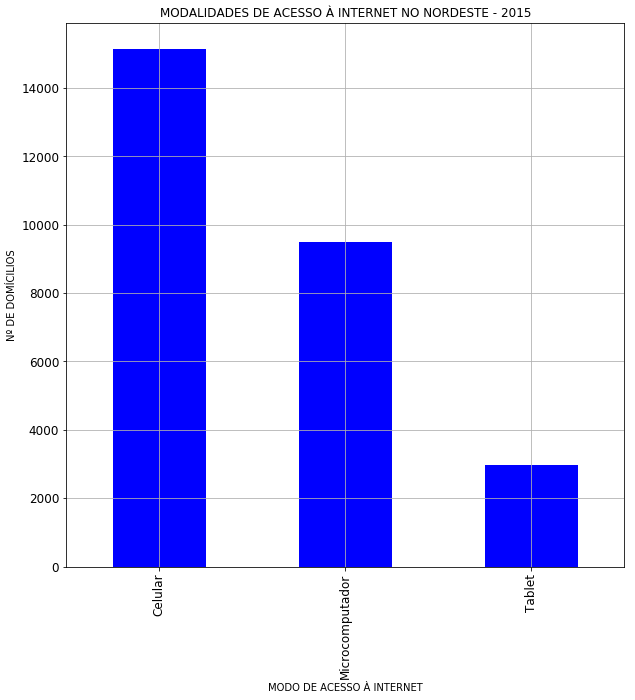

In [21]:
ax = tabf.plot(kind='bar', title ="MODALIDADES DE ACESSO À INTERNET NO NORDESTE - 2015",figsize=(10,10),legend=False, fontsize=12,color='b')
plt.grid()
plt.ylabel('Nº DE DOMÍCILIOS')
plt.xlabel('MODO DE ACESSO À INTERNET')
plot.set_ylim([0, 16044])

In [22]:
nordeste.to_csv('Projeto1_HugoGR.csv', index=False, encoding='utf-8')